<a href="https://colab.research.google.com/github/sudharshanreddy4567/SQL/blob/main/sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from random import randint, choice
from datetime import datetime, timedelta

In [24]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  data TEXT,
  product TEXT,
  quantity INTEGER,
  price_per_unit REAL
)
""")
conn.commit()

In [25]:

products = ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'USB', 'Cable']
base_date = datetime(2023, 1, 1)

for _ in range(50):
    random_days = randint(0, 364)
    date = (base_date + timedelta(days=random_days)).strftime('%Y-%m-%d')
    product = choice(products)
    quantity = randint(1, 10)
    price_per_unit = round(randint(20, 100) + randint(0, 99) / 100.2, 2)

    cursor.execute("""
    INSERT INTO sales(data, product, quantity, price_per_unit)
    VALUES (?, ?, ?, ?)""", (date, product, quantity, price_per_unit))

conn.commit()


In [53]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price_per_unit) AS revenue
FROM sales
GROUP BY product
"""


In [54]:
df = pd.read_sql_query(query, conn)

In [55]:
df

,product,total_qty,revenue
0,Cable,106,6471.31
1,Keyboard,146,9490.73
2,Laptop,119,7918.74
3,Monitor,143,9638.12
4,Mouse,168,10618.21
5,USB,174,9850.61


In [30]:
df.shape

(150, 5)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              150 non-null    int64  
 1   data            150 non-null    object 
 2   product         150 non-null    object 
 3   quantity        150 non-null    int64  
 4   price_per_unit  150 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.0+ KB


<Figure size 800x500 with 0 Axes>

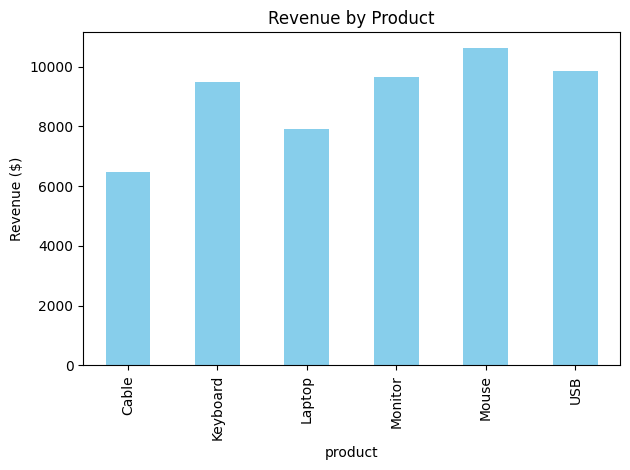

In [56]:
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("chart1_revenue_by_product.png")
plt.show()

<Figure size 800x500 with 0 Axes>

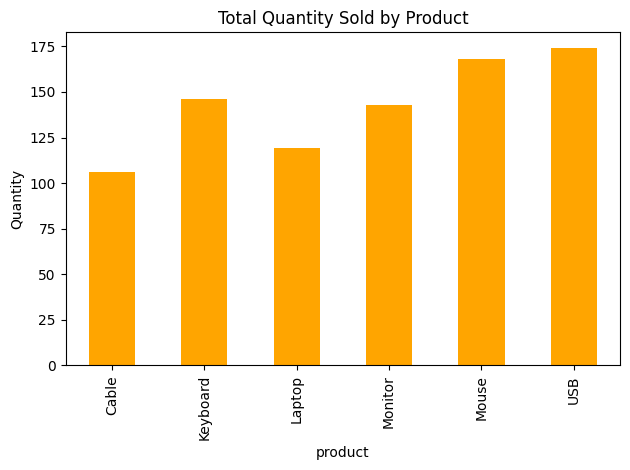

In [57]:
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='total_qty', legend=False, color='orange')
plt.title("Total Quantity Sold by Product")
plt.ylabel("Quantity")
plt.tight_layout()
plt.savefig("chart2_quantity_by_product.png")
plt.show()


Index(['id', 'data', 'product', 'quantity', 'price_per_unit'], dtype='object')

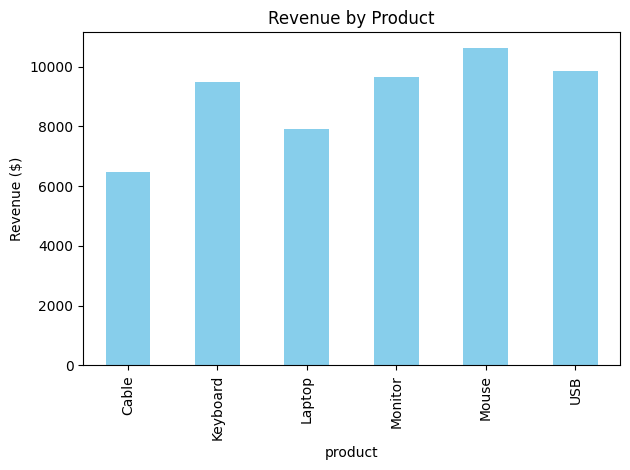

In [58]:

df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("chart1_revenue_by_product.png")
plt.show()

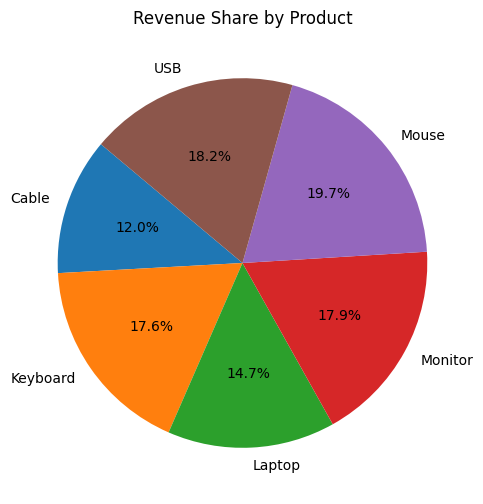

In [59]:
plt.figure(figsize=(6, 6))
plt.pie(df['revenue'], labels=df['product'], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Product")
plt.savefig("chart3_revenue_pie.png")
plt.show()


In [60]:
sales_df = pd.read_sql_query("SELECT * FROM sales", conn)
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df['month'] = sales_df['date'].dt.to_period('M')
monthly_revenue = sales_df.groupby('month')['quantity'].sum()

KeyError: 'date'

In [ ]:
  3804         try:
-> 3805             return self._engine.get_loc(casted_key)
   3806         except KeyError as err:

index.pyx in pandas._libs.index.IndexEngine.get_loc()

index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'date'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
2 frames
/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py in get_loc(self, key)
   3810             ):
   3811                 raise InvalidIndexError(key)
-> 3812             raise KeyError(key) from err
   3813         except TypeError:
   3814             # If we have a listlike key, _check_indexing_error will raise

KeyError: 'date'

In [61]:
sales_df = pd.read_sql_query("SELECT * FROM sales", conn)

In [62]:
print(sales_df.columns)


Index(['id', 'data', 'product', 'quantity', 'price_per_unit'], dtype='object')


In [65]:
sales_df.rename(columns={'data': 'date'}, inplace=True)

In [66]:
sales_df['date'] = pd.to_datetime(sales_df['date'])

In [67]:
sales_df['month'] = sales_df['date'].dt.to_period('M')

In [68]:
sales_df['revenue'] = sales_df['quantity'] * sales_df['price_per_unit']
monthly_revenue = sales_df.groupby('month')['revenue'].sum().reset_index()


In [69]:
print(monthly_revenue)


      month  revenue
0   2023-01  4460.72
1   2023-02  2506.67
2   2023-03  5543.81
3   2023-04  1862.40
4   2023-05  2685.30
5   2023-06  3400.01
6   2023-07  5382.30
7   2023-08  6132.10
8   2023-09  6157.48
9   2023-10  7302.01
10  2023-11  4483.22
11  2023-12  4071.70


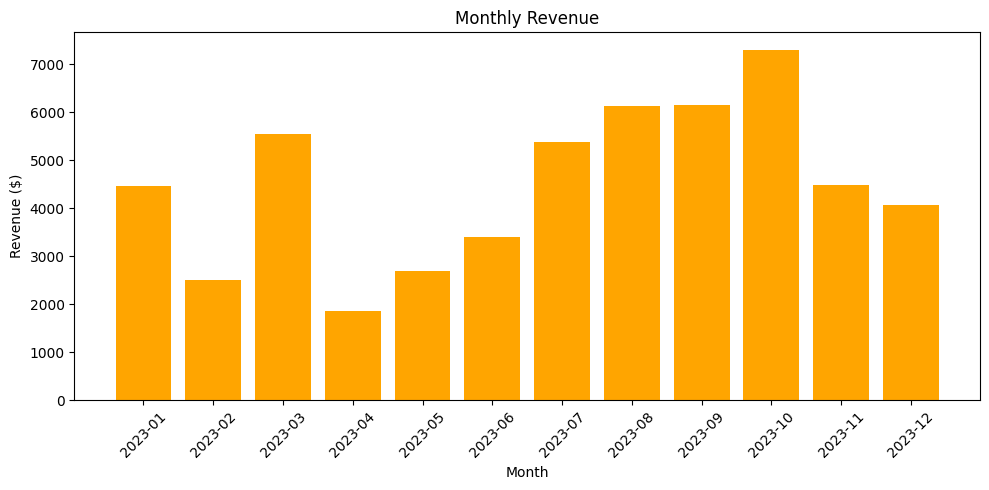

In [70]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue['month'].astype(str), monthly_revenue['revenue'], color='orange')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("chart2_monthly_revenue.png")
plt.show()


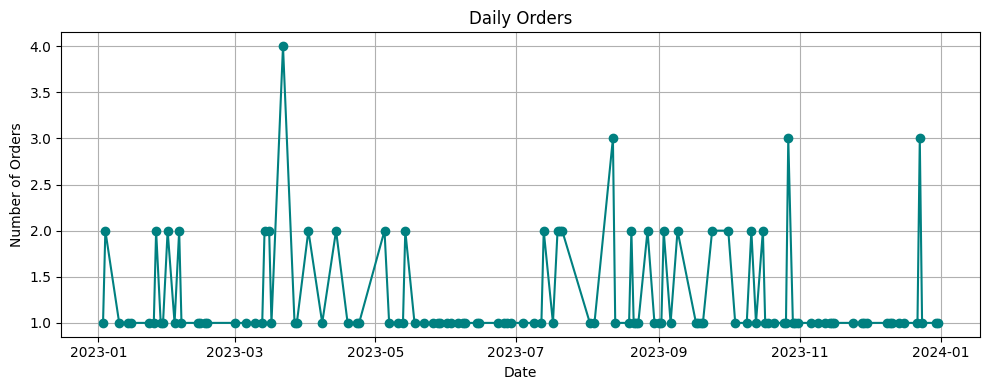

In [71]:
daily_orders = sales_df.groupby('date')['id'].count().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(daily_orders['date'], daily_orders['id'], marker='o', linestyle='-', color='teal')
plt.title("Daily Orders")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.savefig("chart5_orders_per_day.png")
plt.show()


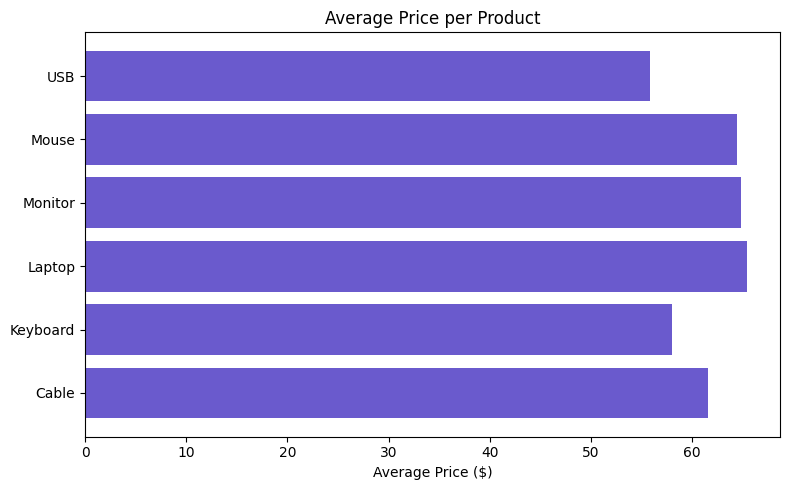

In [72]:
avg_price = sales_df.groupby('product')['price_per_unit'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.barh(avg_price['product'], avg_price['price_per_unit'], color='slateblue')
plt.title("Average Price per Product")
plt.xlabel("Average Price ($)")
plt.tight_layout()
plt.savefig("chart4_avg_price_per_product.png")
plt.show()


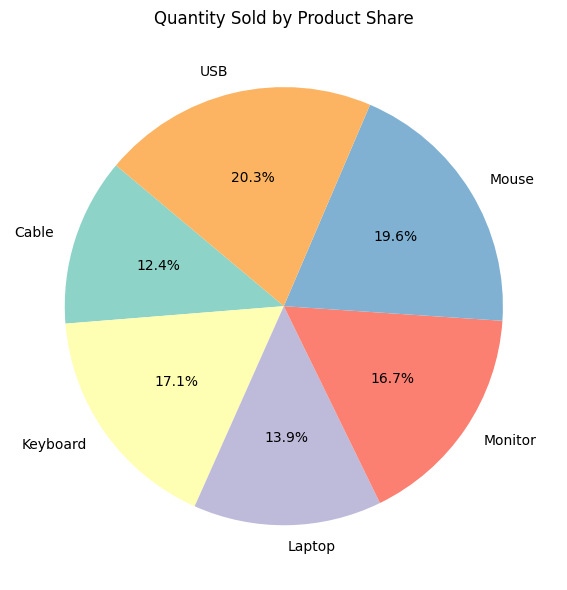

In [73]:
product_quantity = sales_df.groupby('product')['quantity'].sum()

plt.figure(figsize=(6, 6))
plt.pie(product_quantity, labels=product_quantity.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Quantity Sold by Product Share")
plt.tight_layout()
plt.savefig("chart6_quantity_pie.png")
plt.show()
